In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

In [6]:
df=pd.read_csv("Student_Performance.csv")
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
col="Performance Index"
x = df.drop(["Extracurricular Activities","Performance Index"],axis=1)
y=df["Performance Index"]

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.4,shuffle=True)
# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=2)
X_train_k_best = select_k_best.fit_transform(xtrain, ytrain)
print("Selected features:", xtrain.columns[select_k_best.get_support()])

Selected features: Index(['Hours Studied', 'Previous Scores'], dtype='object')


In [9]:
model=LinearRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

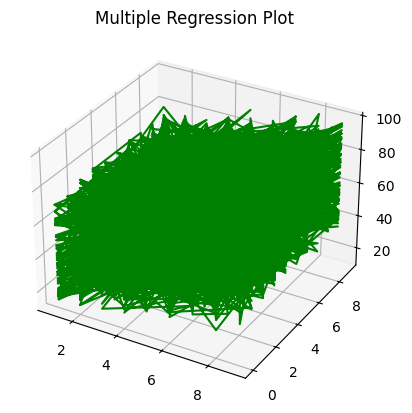

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xtest["Hours Studied"], xtest["Sample Question Papers Practiced"], ytest, 'green')
ax.set_title('Multiple Regression Plot')
plt.show()